In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df = pd.read_csv('population_density_long.csv')

In [3]:
df.shape

(12067, 3)

In [5]:
df.tail(5)

,Country Name,Year,Count
12062,Kosovo,2017,168
12063,"Yemen, Rep.",2017,52
12064,South Africa,2017,46
12065,Zambia,2017,22
12066,Zimbabwe,2017,36


In [39]:
current_year = 2017
dff = (df[df['Year'].eq(current_year)]
       .sort_values(by='Count', ascending=True)
       .tail(10))

In [40]:
dff

,Country Name,Year,Count
12034,Sint Maarten (Dutch part),2017,1193
11868,Bangladesh,2017,1226
11980,Malta,2017,1462
11975,Maldives,2017,1654
11870,Bahrain,2017,1920
11922,Gibraltar,2017,3372
11933,"Hong Kong SAR, China",2017,7039
12021,Singapore,2017,7915
11972,Monaco,2017,19196
11969,"Macao SAR, China",2017,20479


<BarContainer object of 10 artists>

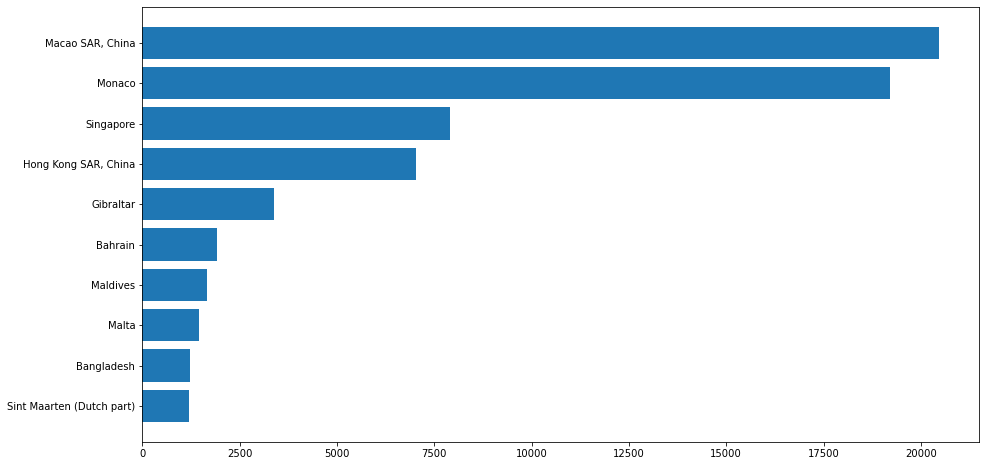

In [41]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country Name'], dff['Count'])

Text(1, 0.5, '2017')

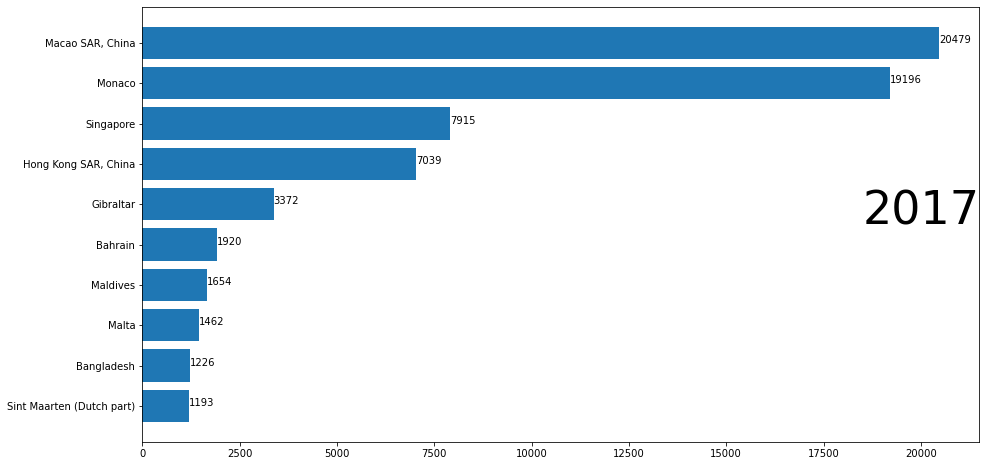

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country Name'], dff['Count'])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['Count'], dff['Country Name'])):
    ax.text(value, i,     value,           ha='left')   # 38194: value
# Add year right middle portion of canvas
ax.text(1, 0.5, current_year, size=46, ha='right', transform=ax.transAxes)

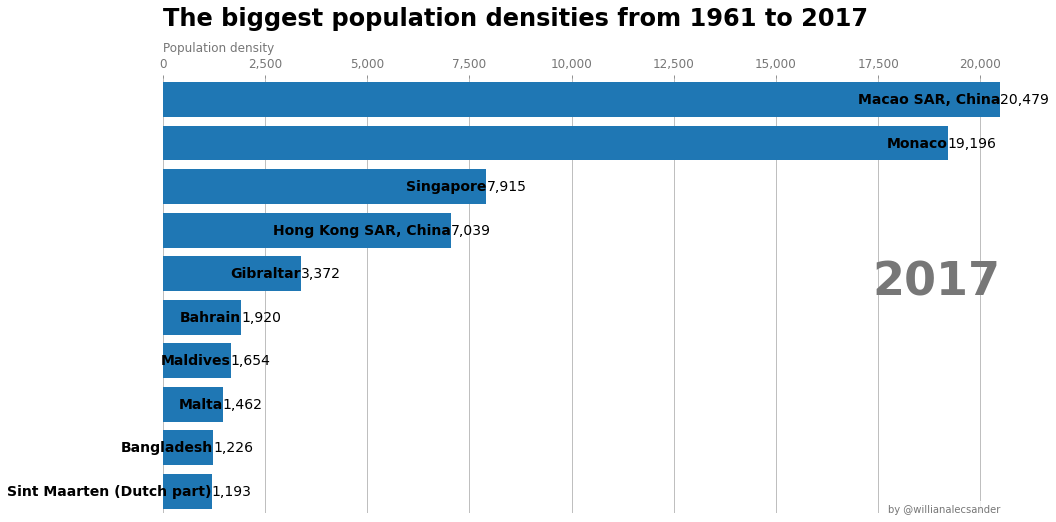

In [54]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='Count', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country Name'], dff['Count'])
    for i, (value, name) in enumerate(zip(dff['Count'], dff['Country Name'])):
        ax.text(value, i,     name,           size=14, weight=600, ha='right', va='center')
        ax.text(value, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.5, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population density', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The biggest population densities from 1961 to 2017',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @willianalecsander', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2017)

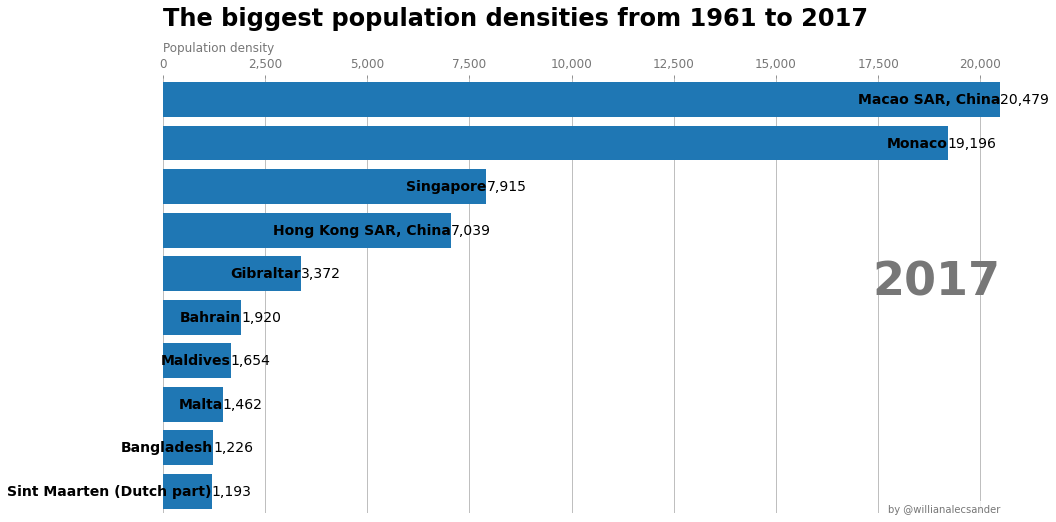

In [56]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1961, 2018))
HTML(animator.to_jshtml())